<a href="https://colab.research.google.com/github/aakashkumarme/MLAlgo/blob/main/BIRCH_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The BIRCH is a Clustering algorithm in machine learning. It stands for Balanced Reducing and Clustering using Hierarchies. 
############

BIRCH is a clustering algorithm in machine learning that has been specially designed for clustering on a very large data set. It is often faster than other clustering algorithms like batch K-Means. It provides a very similar result to the batch K-Means algorithm if the number of features in the dataset is not more than 20.This clustering algorithm can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset.
###########

When training the model using the BIRCH algorithm, it creates a tree structure with enough data to quickly assign each data point to a cluster. By storing all the data points in the tree, this algorithm allows the use of limited memory while working on a very large data set.

############
BIRCH is often used to complement other clustering algorithms by creating a summary of the dataset that the other clustering algorithm can now use.

However, BIRCH has one major drawback – it can only process metric attributes. A metric attribute is any attribute whose values can be represented in Euclidean space i.e., no categorical attributes should be present.

############
Before we implement BIRCH, we must understand two important terms: Clustering Feature (CF) and CF – Tree

Clustering Feature (CF):
BIRCH summarizes large datasets into smaller, dense regions called Clustering Feature (CF) entries. Formally, a Clustering Feature entry is defined as an ordered triple, (N, LS, SS) where ‘N’ is the number of data points in the cluster, ‘LS’ is the linear sum of the data points and ‘SS’ is the squared sum of the data points in the cluster. It is possible for a CF entry to be composed of other CF entries.

CF Tree:
The CF tree is the actual compact representation that we have been speaking of so far. A CF tree is a tree where each leaf node contains a sub-cluster. Every entry in a CF tree contains a pointer to a child node and a CF entry made up of the sum of CF entries in the child nodes. There is a maximum number of entries in each leaf node. This maximum number is called the threshold. We will learn more about what this threshold value is.
#############

Parameters of BIRCH Algorithm :

**threshold** :  threshold is the maximum number of data points a sub-cluster in the leaf node of the CF tree can hold.
branching_factor : This parameter specifies the maximum number of CF **sub-clusters** in each node (internal node).
**n_clusters** : The number of clusters to be returned after the entire BIRCH algorithm is complete i.e., number of clusters after the final clustering step. If set to None, the final clustering step is not performed and intermediate clusters are returned.






In [1]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
#Here I will rename the columns for simplicity and then I will only select two columns for implementing the BIRCH clustering algorithm using Python:

data["Income"] = data[["Annual Income (k$)"]]
data["Spending"] = data[["Spending Score (1-100)"]]
data = data[["Income", "Spending"]]
print(data.head())

   Income  Spending
0      15        39
1      15        81
2      16         6
3      16        77
4      17        40


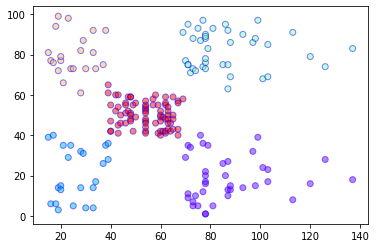

In [4]:
import matplotlib.pyplot as plt

from sklearn.cluster import Birch
model = Birch(branching_factor=30, n_clusters=5, threshold=2.5)
model.fit(data)
pred = model.predict(data)
plt.scatter(data["Income"], data["Spending"], c=pred, cmap='rainbow', alpha=0.5, edgecolors='b')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


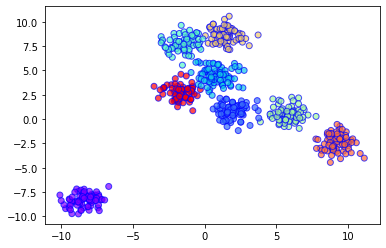

In [5]:
## Example2

# Import required libraries and modules
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

# Generating 600 samples using make_blobs
dataset, clusters = make_blobs(n_samples = 600, centers = 8, cluster_std = 0.75, random_state = 0)

# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)

# Fit the data (Training)
model.fit(dataset)

# Predict the same data
pred = model.predict(dataset)

# Creating a scatter plot
plt.scatter(dataset[:, 0], dataset[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()